In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('hotel_bookings_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df_clean = df.copy()

In [7]:
df_clean.isna().sum().sort_values(ascending = False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

## Cleansing

In [8]:
df_clean.drop(columns = ['company','agent'],inplace = True)

In [9]:
df_clean['city'] = df_clean['city'].fillna('unknown')
df_clean['children'] = df_clean['children'].fillna(df_clean['children'].median())

In [10]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [11]:
df_clean = df_clean.replace({'meal': {'Undefined':'No Meal'}})
df_clean['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [12]:
df_clean.isna().sum().sort_values(ascending = False)

hotel                             0
market_segment                    0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
city                              0
is_canceled                       0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_weekdays_nights          0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year                 0
lead_time                         0
reservation_status                0
dtype: int64

In [13]:
df_clean['children'] = df_clean['children'].astype('int64')

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

## Drop Unnecesary Data

In [15]:
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,0,Personal,98.0,0,1,Check-Out


In [16]:
df_clean['total_guest'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean['stay_duration'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']

In [17]:
df_clean[(df_clean['total_guest'] > 0) & (df_clean['stay_duration'] > 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,Personal,75.00,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,0,Personal,75.00,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,0,Personal,98.00,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,0,Personal,98.00,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,Personal,107.00,0,0,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Personal,96.14,0,0,Check-Out,2,7
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,0,Personal,225.43,0,2,Check-Out,3,7
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,0,Personal,157.71,0,4,Check-Out,2,7
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,0,Personal,104.40,0,0,Check-Out,2,7


In [18]:
df_cleaned = df_clean[(df_clean['total_guest'] > 0) & (df_clean['stay_duration'] > 0)]

In [19]:
print('before pre-processing:', df_clean.shape[0])
print('after pre-processing:', df_cleaned.shape[0])

before pre-processing: 119390
after pre-processing: 118565


In [20]:
df_final = df_cleaned.copy()

In [21]:
df_final.shape

(118565, 29)

In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_weekdays_nights        118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal            

## Monthly booking analysis based on hotel type

In [23]:
df2_ba = df_final.groupby(['hotel','arrival_date_month','arrival_date_year']).agg({'total_guest':'count'}).reset_index()
df2_ba

,hotel,arrival_date_month,arrival_date_year,total_guest
0,City Hotel,April,2018,2347
1,City Hotel,April,2019,2570
2,City Hotel,August,2018,3914
3,City Hotel,August,2019,3960
4,City Hotel,December,2017,3368
5,City Hotel,December,2018,4186
6,City Hotel,February,2017,1637
7,City Hotel,February,2018,2460
8,City Hotel,January,2017,1225
9,City Hotel,January,2018,3084


In [24]:
#create ammout of year per hotel and month
df_monthly_year = df2_ba.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year':'count'})

In [25]:
df2_ba= df2_ba.merge(df_monthly_year, on = ['hotel', 'arrival_date_month'])
df2_ba.rename(columns={'total_guest':'total_booking', 'arrival_date_year_x':'arrival_date_year', 'arrival_date_year_y':'ammount_of_year'}, inplace=True)

In [26]:
#Create total of booking per hotel and month
df2_ba_sum = df2_ba.groupby(['hotel', 'arrival_date_month']).agg({'total_booking':'sum'})
df2_ba_sum.rename(columns={'total_booking':'sum_booking'}, inplace=True)
df2_ba = df2_ba.merge(df2_ba_sum, on=['hotel', 'arrival_date_month'])

In [27]:
#create average num booking per hotel, month and year
df2_ba['avg_num_booking'] = round(df2_ba['sum_booking']/df2_ba['ammount_of_year'])

In [28]:
df2_ba

,hotel,arrival_date_month,arrival_date_year,total_booking,ammount_of_year,sum_booking,avg_num_booking
0,City Hotel,April,2018,2347,2,4917,2458.0
1,City Hotel,April,2019,2570,2,4917,2458.0
2,City Hotel,August,2018,3914,2,7874,3937.0
3,City Hotel,August,2019,3960,2,7874,3937.0
4,City Hotel,December,2017,3368,2,7554,3777.0
5,City Hotel,December,2018,4186,2,7554,3777.0
6,City Hotel,February,2017,1637,2,4097,2048.0
7,City Hotel,February,2018,2460,2,4097,2048.0
8,City Hotel,January,2017,1225,2,4309,2154.0
9,City Hotel,January,2018,3084,2,4309,2154.0


In [29]:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2_ba['month'] = df2_ba['arrival_date_month'].str[:3]
df2_ba['month'] = pd.Categorical(df2_ba['month'], categories=ordered_months, ordered=True)

df2_ba

,hotel,arrival_date_month,arrival_date_year,total_booking,ammount_of_year,sum_booking,avg_num_booking,month
0,City Hotel,April,2018,2347,2,4917,2458.0,Apr
1,City Hotel,April,2019,2570,2,4917,2458.0,Apr
2,City Hotel,August,2018,3914,2,7874,3937.0,Aug
3,City Hotel,August,2019,3960,2,7874,3937.0,Aug
4,City Hotel,December,2017,3368,2,7554,3777.0,Dec
5,City Hotel,December,2018,4186,2,7554,3777.0,Dec
6,City Hotel,February,2017,1637,2,4097,2048.0,Feb
7,City Hotel,February,2018,2460,2,4097,2048.0,Feb
8,City Hotel,January,2017,1225,2,4309,2154.0,Jan
9,City Hotel,January,2018,3084,2,4309,2154.0,Jan


In [30]:
df2_ba_final = df2_ba[['hotel','month','arrival_date_year','total_booking','avg_num_booking']]

In [31]:
df2_ba_final.rename(columns={'arrival_date_year':'year','avg_num_booking':'avg_booking'},inplace = True)

In [32]:
df2_ba_final

,hotel,month,year,total_booking,avg_booking
0,City Hotel,Apr,2018,2347,2458.0
1,City Hotel,Apr,2019,2570,2458.0
2,City Hotel,Aug,2018,3914,3937.0
3,City Hotel,Aug,2019,3960,3937.0
4,City Hotel,Dec,2017,3368,3777.0
5,City Hotel,Dec,2018,4186,3777.0
6,City Hotel,Feb,2017,1637,2048.0
7,City Hotel,Feb,2018,2460,2048.0
8,City Hotel,Jan,2017,1225,2154.0
9,City Hotel,Jan,2018,3084,2154.0


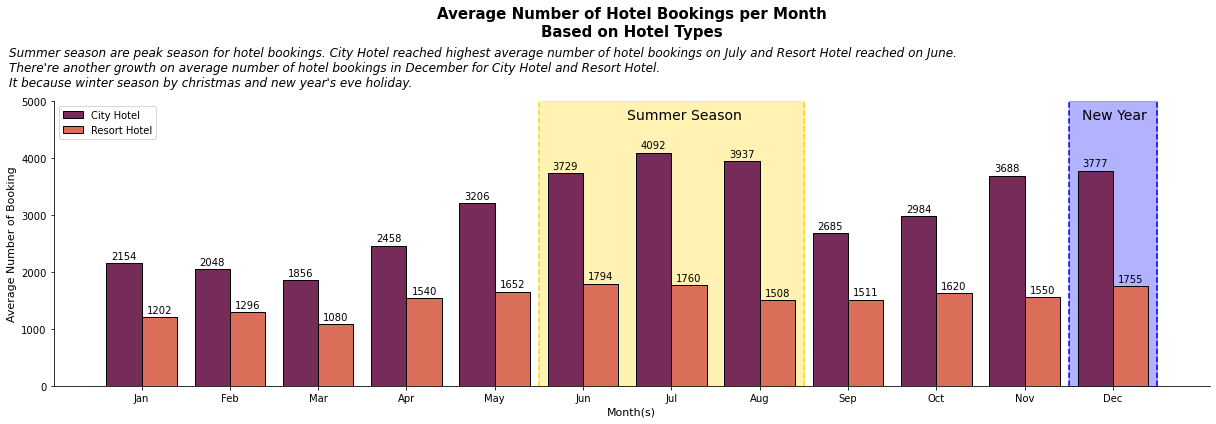

In [46]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Average Number of Hotel Bookings per Month\nBased on Hotel Types", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1.5, y=5250,
         s="Summer season are peak season for hotel bookings. City Hotel reached highest average number of hotel bookings on July and Resort Hotel reached on June.\nThere're another growth on average number of hotel bookings in December for City Hotel and Resort Hotel.\nIt because winter season by christmas and new year's eve holiday.",
         fontsize=12, fontstyle='italic')
sns.barplot(x='month', y='avg_booking', data=df2_ba_final, hue='hotel', edgecolor='black', palette='rocket')

plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.ylim(0, 5000)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(4.5, ls='--', color='gold')
plt.axvline(7.5, ls='--', color='gold')
plt.stackplot(np.arange(4.5,8.5), [[5000]], color='gold', alpha=0.3)
plt.text(x=5.5, y=4750, s='Summer Season', fontsize=14, color='black', va='center')

plt.axvline(10.5, ls='--', color='blue')
plt.axvline(11.5, ls='--', color='blue')
plt.stackplot(np.arange(10.5,12), [[5000]], color='blue', alpha=0.3)
plt.text(x=10.65, y=4750, s='New Year', fontsize=14, color='black', va='center')
ax.legend(loc=2)

sns.despine()
plt.tight_layout()
#plt.savefig('Average Number of Hotel Bookings per Month Based on Hotel Types.png')